In [1]:
import numpy as np
from lattice import Lattice2D, BrickwallLatticeGeometry, RectangularLatticeGeometry, SimulationParameters, SimulationData
import matplotlib.pyplot as plt

In [ ]:
omega = 2 * np.pi/3
def E(t):
    return np.sin(omega * t)


geometry = BrickwallLatticeGeometry((9, 20))
# geometry_r = RectangularLatticeGeometry((10, 20))

params = SimulationParameters(
    t_hop=1.0,
    E_amplitude=E,
    E_direction=np.array([0, -1]),
    h=0.01,
    T=50,
    charge=1,
    initial_occupation=0.5,
    substeps=10
)

lattice = Lattice2D(geometry, params)
lattice.evolve(solver="rk4")

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 20000/20000 [00:34<00:00, 579.85it/s]


In [66]:
lattice.save_lattice_animation("examples/9x20_combined_animation.gif", fps=5, sample_every=39, dpi=50)

Generating animation: 100%|██████████| 52/52 [00:55<00:00,  1.08s/frame]

In [49]:
lattice_r.save_current_density_animation("examples/10x20_r_omega20pi.gif", fps=10, sample_every=10, dpi=50)

Generating animation: 100%|██████████| 100/100 [02:00<00:00,  1.20s/frame]


In [5]:
lattice.save_current_density_animation("examples/9x20_bw_omega20pi.gif", fps=10, sample_every=10, dpi=50)

Generating animation: 100%|██████████| 100/100 [01:25<00:00,  1.17frame/s]


In [6]:
data = SimulationData.from_lattice(lattice, omega)

In [30]:
omega

62.83185307179586

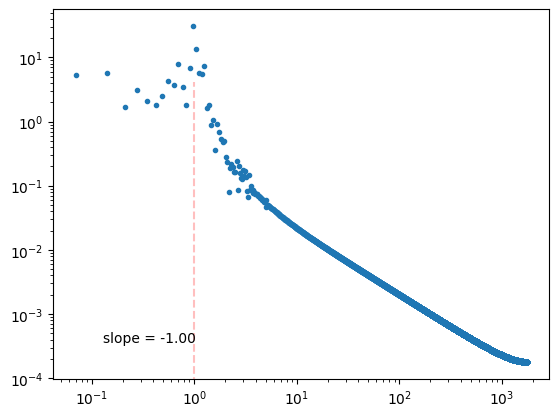

In [52]:
plt.loglog(data3.freqs, data3.M_fft, ".")

# Find the slope of the line in log-log space
log_x = np.log(data.freqs[:300])
log_y = np.log(data.M_fft[:300])
slope, intercept = np.polyfit(log_x, log_y, 1)
plt.text(0.1, 0.1, f'slope = {slope:.2f}', transform=plt.gca().transAxes)
plt.vlines(1, np.min(log_y), np.max(log_x) ,color="red", linestyle="--", alpha=0.25)
plt.show()

In [50]:
lattice3 = Lattice2D.load("results/brickwall_7x14_omega_3-5.lattice")

In [55]:
data_r = SimulationData.from_lattice(lattice_r, omega)

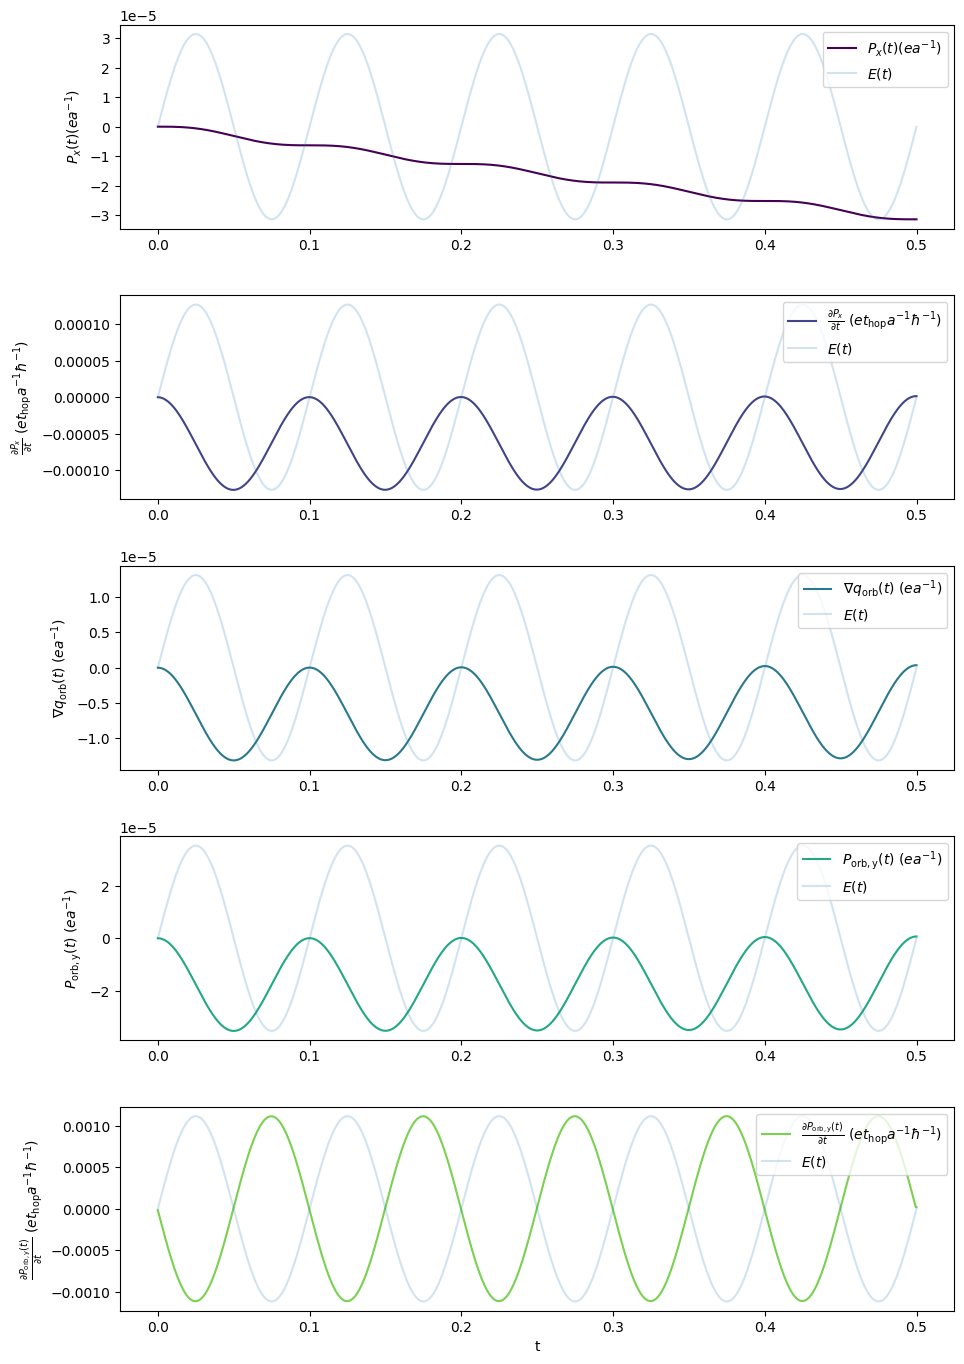

In [56]:
data_r.plot_simulation_time_series()
plt.savefig("examples/10x20_r_omega20pi_series.png")
plt.show()

# data.plot_simulation_fft()
# plt.savefig("examples/9x20_bw_omega20pi_fft.pdf")
# plt.show()

(<Figure size 1000x1200 with 4 Axes>,
 array([<Axes: title={'center': 'FFT of $E$'}, ylabel='Amplitude'>,
        <Axes: title={'center': 'FFT of $P_x$'}, ylabel='Amplitude'>,
        <Axes: title={'center': 'FFT of $P_{\\rm orb, y}(t)$'}, ylabel='Amplitude'>,
        <Axes: title={'center': 'FFT of $\\nabla q_{\\rm orb}(t)$'}, xlabel='Frequency / $\\omega$', ylabel='Amplitude'>],
       dtype=object))

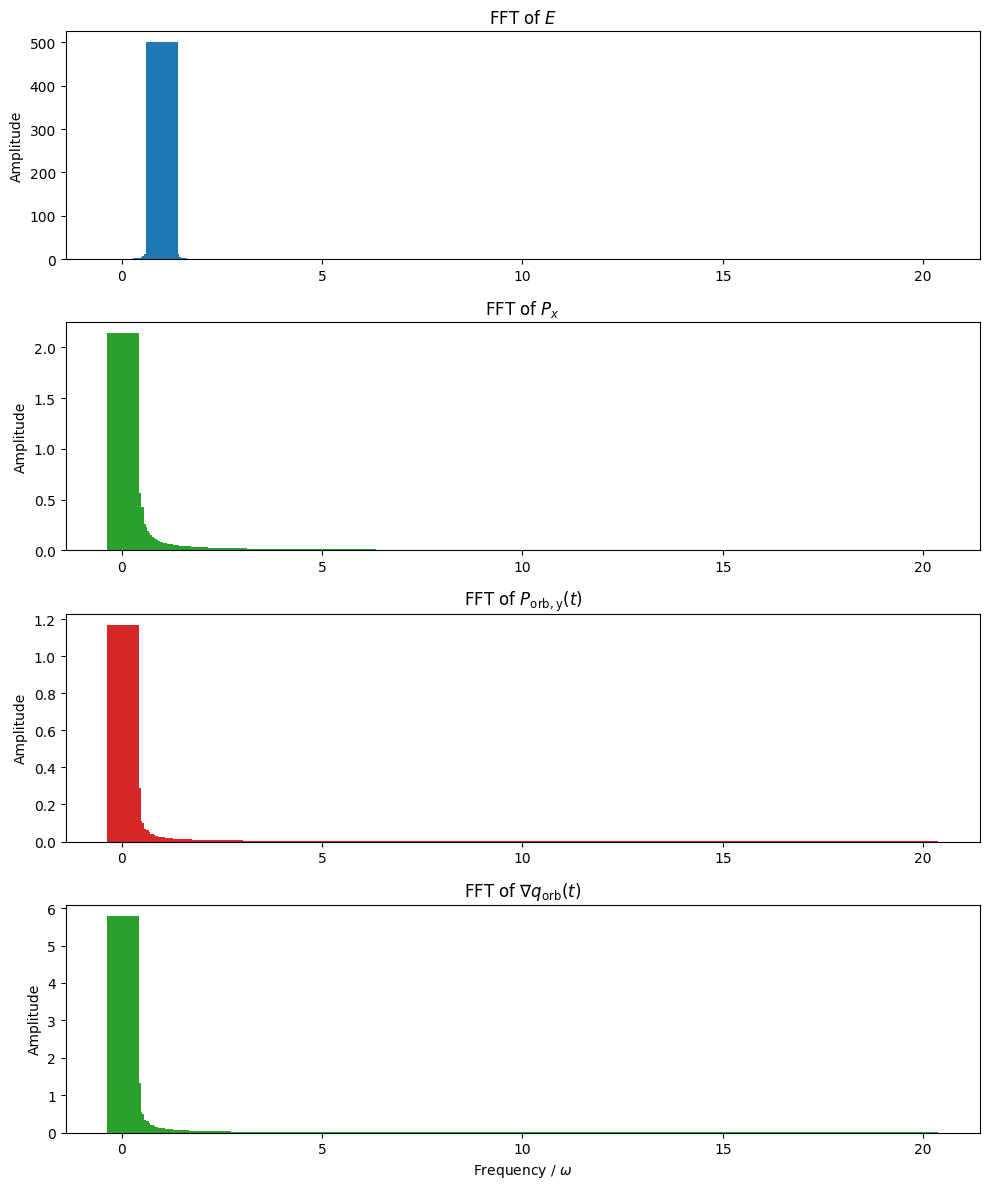

In [5]:
data.plot_simulation_fft()

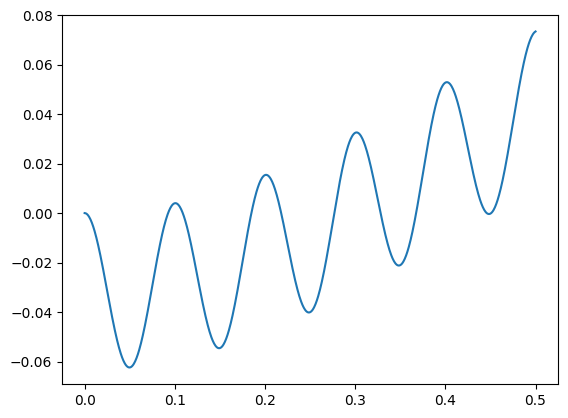

In [57]:
q_norm = data.M_grad[:, 0] / np.max(np.abs(data.M_grad[:, 0]))
P_orb_norm = data.M / np.max(np.abs(data.M))

plt.plot(data.t, q_norm-P_orb_norm)

In [1]:
from lattice import HexagonalLatticeGeometry, Lattice2D, SimulationParameters, BrickwallLatticeGeometry, SimulationData
import numpy as np
import matplotlib.pyplot as plt

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 10000/10000 [00:03<00:00, 3103.87it/s]


Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 100000/100000 [00:40<00:00, 2442.56it/s]



Average relative l2 error: 3.322023202396047e-06


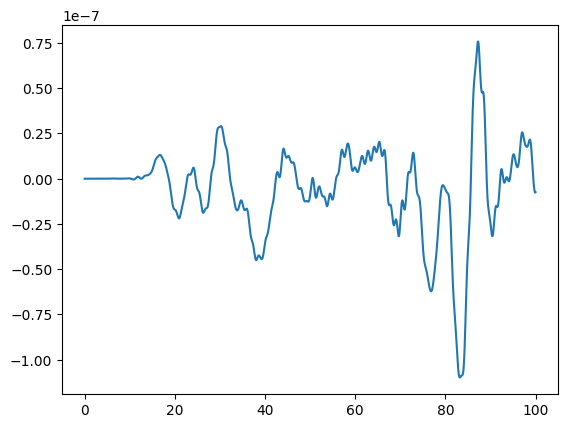

In [64]:
geometry = BrickwallLatticeGeometry((5, 10))
params = SimulationParameters(t_hop=1.0, E_amplitude=np.sin, E_direction=np.array([0, -1]), h=0.01, T=100, charge=1, initial_occupation=0.5)

l1 = Lattice2D(geometry, params)
l1.evolve(solver="rk4")

params.substeps *= 10

l2 = Lattice2D(geometry, params)
l2.evolve(solver="rk4")

data1 = SimulationData.from_lattice(l1, 1)
data2 = SimulationData.from_lattice(l2, 1)

diff = np.array(data1.P) - np.array(data2.P)
L2_norm = np.linalg.norm(diff) / np.sqrt(len(diff))

print(f"\nAverage relative l2 error: {L2_norm / np.max(np.abs(data1.P))}")
plt.plot(data1.t, diff)
plt.show()

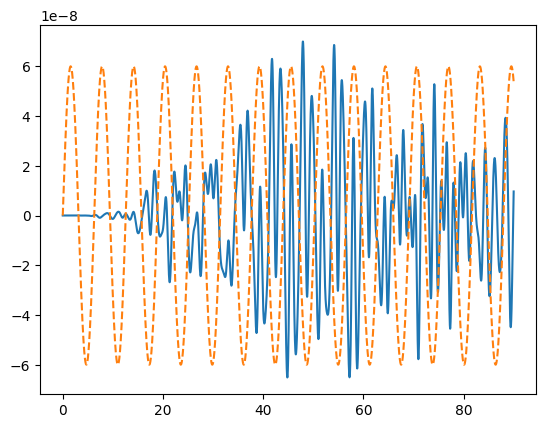

7.949125573372078e-07


7.949125573372078e-07


Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


100%|██████████| 2000/2000 [00:01<00:00, 1496.08it/s]


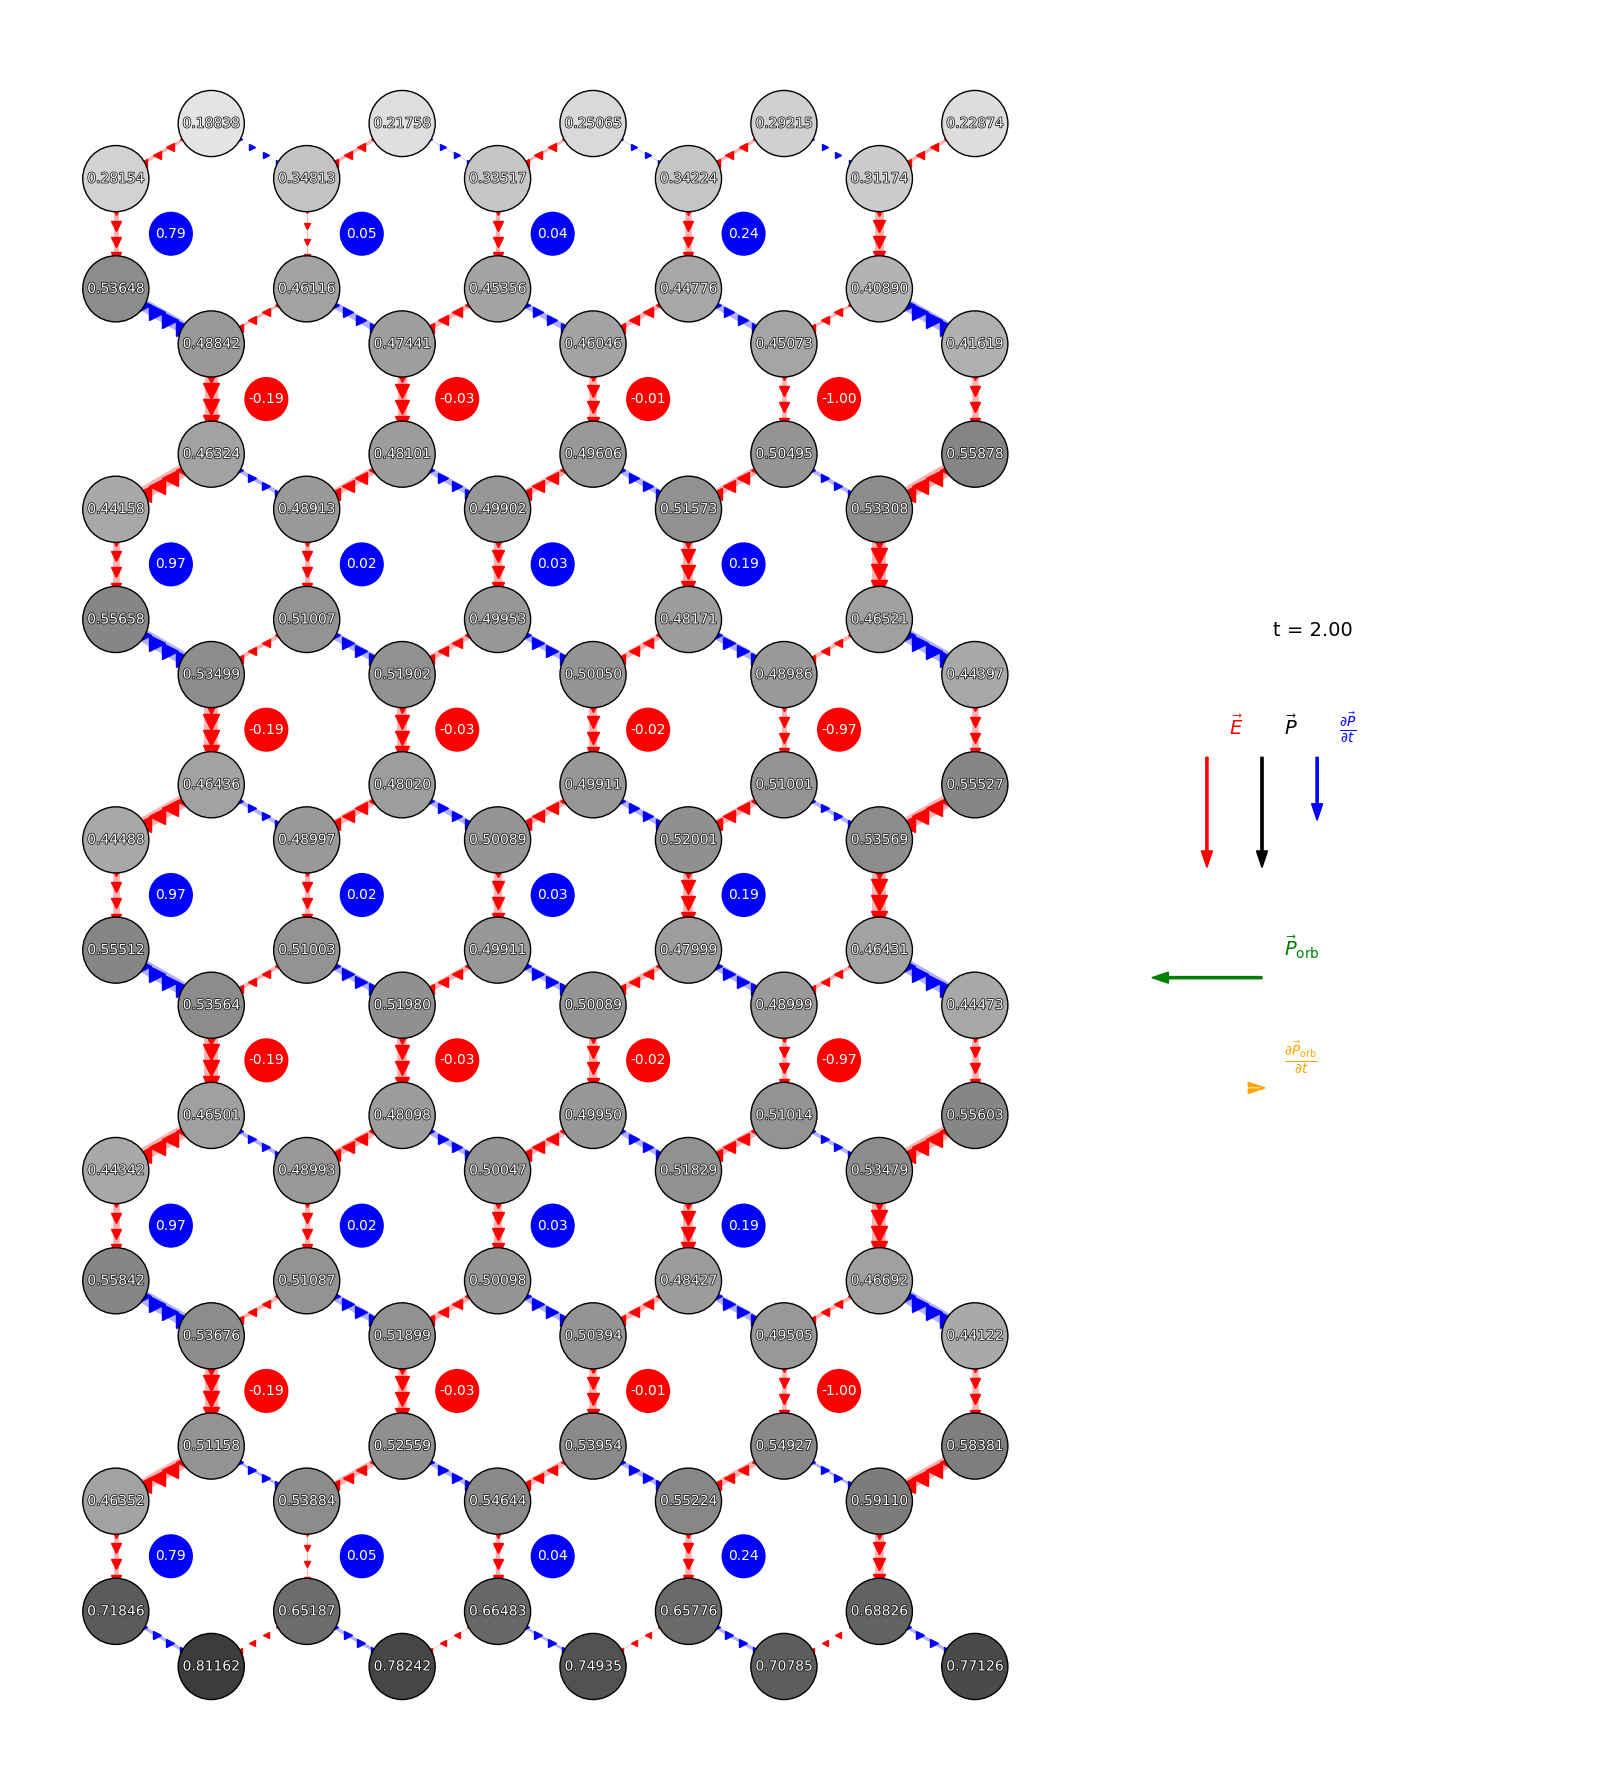

In [ ]:


l = Lattice2D(geometry=HexagonalLatticeGeometry((10, 10)), simulation_parameters=SimulationParameters(1, 1.0, np.array([0, -1]), 0.01, 2, 1, 0.5, substeps=10))
l.evolve(solver="rk4")

fig, ax = plt.subplots(figsize=(18, 18))
l.plot_current_density(len(l.states)-1, auto_normalize=True, ax=ax)

plt.savefig("examples/hexagonal_lattice_current_density.png")

In [6]:
l.save_current_density_animation("hexa_test.gif", sample_every=1, fps=7, dpi=40)

Generating animation: 100%|██████████| 101/101 [00:44<00:00,  2.25frame/s]
